In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-transactions-dataset/Products.csv
/kaggle/input/ecommerce-transactions-dataset/Customers.csv
/kaggle/input/ecommerce-transactions-dataset/Transactions.csv


In [2]:
Customers_data = pd.read_csv("/kaggle/input/ecommerce-transactions-dataset/Customers.csv")
Products_data = pd.read_csv("/kaggle/input/ecommerce-transactions-dataset/Products.csv")
Transactions_data = pd.read_csv("/kaggle/input/ecommerce-transactions-dataset/Transactions.csv")

In [3]:
Customers_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
Customer_transactions = pd.merge(Transactions_data, Customers_data, on="CustomerID")

Customer_summary = Customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'nunique',  
}).reset_index()

Customer_summary = pd.merge(Customer_summary, Customers_data[['CustomerID', 'Region']], on="CustomerID")

Customer_summary.head()

,CustomerID,TotalValue,Quantity,TransactionDate,Region
0,C0001,3354.52,12,5,South America
1,C0002,1862.74,10,4,Asia
2,C0003,2725.38,14,4,South America
3,C0004,5354.88,23,8,South America
4,C0005,2034.24,7,3,Asia


In [5]:
features = Customer_summary[['TotalValue', 'Quantity', 'TransactionDate']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the scaled features
scaled_features[:5]

array([[-0.06170143, -0.12203296, -0.01145819],
       [-0.87774353, -0.44800021, -0.46749414],
       [-0.40585722,  0.20393428, -0.46749414],
       [ 1.03254704,  1.67078689,  1.35664965],
       [-0.78392861, -0.93695108, -0.92353008]])

In [6]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change n_clusters to any value between 2 and 10
Customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the clustered data
Customer_summary.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,TotalValue,Quantity,TransactionDate,Region,Cluster
0,C0001,3354.52,12,5,South America,1
1,C0002,1862.74,10,4,Asia,1
2,C0003,2725.38,14,4,South America,1
3,C0004,5354.88,23,8,South America,3
4,C0005,2034.24,7,3,Asia,2


In [7]:
db_index = davies_bouldin_score(scaled_features, Customer_summary['Cluster'])

print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8650620583623065


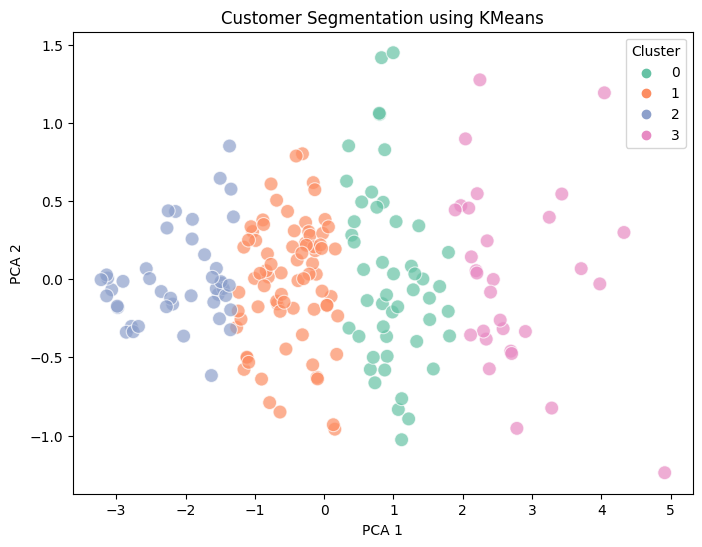

In [8]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = Customer_summary['Cluster']

# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df, s=100, alpha=0.7)
plt.title('Customer Segmentation using KMeans')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [9]:
Num_clusters = Customer_summary['Cluster'].nunique()
print(f'Number of clusters formed: {Num_clusters}')

print(f'Davies-Bouldin Index: {db_index}')

Number of clusters formed: 4
Davies-Bouldin Index: 0.8650620583623065
